# XGBoost

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif
import warnings
warnings.filterwarnings('ignore')

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


In [4]:
#get target
train_m1_target = train_m1['y']
train_m1 = train_m1.drop(columns=['y'])

In [5]:
#get target
test_m1_target = test_m1['y']
test_m1 = test_m1.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,50)):
    xgb = XGBClassifier(max_depth=i)
    xgb.fit(train_m1,train_m1_target)
    predictions = xgb.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]C:\Users\bruno\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
  2%|█▋                                                                                 | 1/49 [00:00<00:13,  3.43it/s]

[22:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  4%|███▍                                                                               | 2/49 [00:00<00:14,  3.14it/s]

[22:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  6%|█████                                                                              | 3/49 [00:01<00:16,  2.73it/s]

[22:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████▊                                                                            | 4/49 [00:01<00:19,  2.29it/s]

[22:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▍                                                                          | 5/49 [00:02<00:23,  1.87it/s]

[22:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|██████████▏                                                                        | 6/49 [00:03<00:27,  1.58it/s]

[22:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|███████████▊                                                                       | 7/49 [00:04<00:32,  1.30it/s]

[22:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 16%|█████████████▌                                                                     | 8/49 [00:05<00:36,  1.11it/s]

[22:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|███████████████▏                                                                   | 9/49 [00:07<00:42,  1.06s/it]

[22:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▋                                                                 | 10/49 [00:08<00:48,  1.24s/it]

[22:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|██████████████████▍                                                               | 11/49 [00:10<00:54,  1.43s/it]

[22:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|████████████████████                                                              | 12/49 [00:12<01:00,  1.64s/it]

[22:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 27%|█████████████████████▊                                                            | 13/49 [00:15<01:07,  1.87s/it]

[22:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 29%|███████████████████████▍                                                          | 14/49 [00:17<01:12,  2.07s/it]

[22:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 31%|█████████████████████████                                                         | 15/49 [00:20<01:16,  2.24s/it]

[22:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|██████████████████████████▊                                                       | 16/49 [00:23<01:19,  2.40s/it]

[22:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 35%|████████████████████████████▍                                                     | 17/49 [00:26<01:25,  2.68s/it]

[22:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 37%|██████████████████████████████                                                    | 18/49 [00:29<01:29,  2.89s/it]

[22:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 39%|███████████████████████████████▊                                                  | 19/49 [00:33<01:31,  3.05s/it]

[22:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 41%|█████████████████████████████████▍                                                | 20/49 [00:36<01:29,  3.09s/it]

[22:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 43%|███████████████████████████████████▏                                              | 21/49 [00:39<01:27,  3.12s/it]

[22:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 45%|████████████████████████████████████▊                                             | 22/49 [00:43<01:28,  3.26s/it]

[22:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 47%|██████████████████████████████████████▍                                           | 23/49 [00:46<01:27,  3.35s/it]

[22:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 49%|████████████████████████████████████████▏                                         | 24/49 [00:50<01:25,  3.40s/it]

[22:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 51%|█████████████████████████████████████████▊                                        | 25/49 [00:54<01:24,  3.50s/it]

[22:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 53%|███████████████████████████████████████████▌                                      | 26/49 [00:57<01:22,  3.57s/it]

[22:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|█████████████████████████████████████████████▏                                    | 27/49 [01:01<01:20,  3.67s/it]

[22:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 57%|██████████████████████████████████████████████▊                                   | 28/49 [01:05<01:17,  3.71s/it]

[22:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 59%|████████████████████████████████████████████████▌                                 | 29/49 [01:09<01:17,  3.87s/it]

[22:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 61%|██████████████████████████████████████████████████▏                               | 30/49 [01:13<01:12,  3.84s/it]

[22:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 63%|███████████████████████████████████████████████████▉                              | 31/49 [01:17<01:11,  3.97s/it]

[22:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 65%|█████████████████████████████████████████████████████▌                            | 32/49 [01:22<01:11,  4.21s/it]

[22:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|███████████████████████████████████████████████████████▏                          | 33/49 [01:26<01:06,  4.18s/it]

[22:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 69%|████████████████████████████████████████████████████████▉                         | 34/49 [01:30<01:00,  4.07s/it]

[22:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 71%|██████████████████████████████████████████████████████████▌                       | 35/49 [01:34<00:58,  4.21s/it]

[22:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|████████████████████████████████████████████████████████████▏                     | 36/49 [01:39<00:55,  4.27s/it]

[22:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|█████████████████████████████████████████████████████████████▉                    | 37/49 [01:43<00:49,  4.13s/it]

[22:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|███████████████████████████████████████████████████████████████▌                  | 38/49 [01:47<00:45,  4.17s/it]

[22:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|█████████████████████████████████████████████████████████████████▎                | 39/49 [01:51<00:39,  4.00s/it]

[22:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|██████████████████████████████████████████████████████████████████▉               | 40/49 [01:55<00:36,  4.02s/it]

[22:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 84%|████████████████████████████████████████████████████████████████████▌             | 41/49 [01:58<00:31,  3.97s/it]

[22:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|██████████████████████████████████████████████████████████████████████▎           | 42/49 [02:02<00:27,  3.93s/it]

[22:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|███████████████████████████████████████████████████████████████████████▉          | 43/49 [02:06<00:23,  3.85s/it]

[22:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████████████████████████████████████████████████████████████████████▋        | 44/49 [02:10<00:19,  3.94s/it]

[22:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|███████████████████████████████████████████████████████████████████████████▎      | 45/49 [02:14<00:15,  3.87s/it]

[22:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 94%|████████████████████████████████████████████████████████████████████████████▉     | 46/49 [02:17<00:11,  3.79s/it]

[22:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 47/49 [02:21<00:07,  3.73s/it]

[22:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 48/49 [02:25<00:03,  3.72s/it]

[22:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [02:29<00:00,  3.04s/it]


Text(0, 0.5, 'Error Rate')

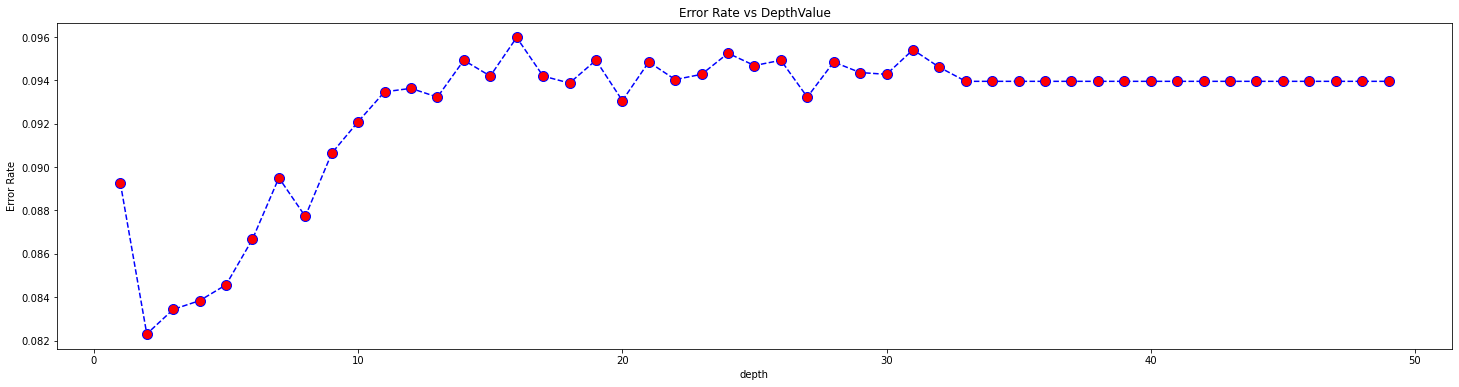

In [7]:
plt.figure(figsize=(25,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [9]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [2, 3,4, 5]
        }

# Create the model
xgboost_model = XGBClassifier(use_label_encoder=False,objective ='binary:logistic',silent=True)

# Best model
opt_model_xgb = GridSearchCV(xgboost_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_xgb.fit(train_m1, train_m1_target)

print (opt_model_xgb.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 2/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 3/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 4/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 5/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 1/5; 2/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 2/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.1s
[CV 2/5; 2/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 2/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 2/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 2/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 4/5; 2/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 2/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.1s
[CV 5/5; 2/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 2/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.1s
[CV 1/5; 3/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 3/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 2/5; 3/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 3/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 3/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 3/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 4/5; 3/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 3/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 3/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 3/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 4/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 4/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.1s
[CV 2/5; 4/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 4/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 4/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 4/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 4/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 4/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 4/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 4/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 5/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 5/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 5/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 5/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 3/5; 5/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 5/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 4/5; 5/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 5/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 5/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 5/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 6/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 6/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 6/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 6/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 6/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 6/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 4/5; 6/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 6/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 5/5; 6/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 6/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 7/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 7/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 7/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 7/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 7/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 7/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 4/5; 7/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 7/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 5/5; 7/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 7/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 1/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 3/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 4/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 1/5; 10/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 10/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 10/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 10/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 10/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 10/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 10/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 10/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 10/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 10/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 11/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 11/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 2/5; 11/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 11/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 11/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 11/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 4/5; 11/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 11/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 5/5; 11/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 11/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 1/5; 12/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 12/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 2/5; 12/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 12/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 12/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 12/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 12/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 12/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 5/5; 12/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 12/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 13/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 13/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 2/5; 13/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 13/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 3/5; 13/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 13/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 4/5; 13/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 13/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 5/5; 13/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 13/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 1/5; 14/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 14/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 2/5; 14/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 14/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 14/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 14/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 4/5; 14/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 14/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 5/5; 14/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 14/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 1/5; 15/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 2/5; 15/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 3/5; 15/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 15/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 5/5; 15/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 5/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 17/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 17/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 2/5; 17/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 17/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 3/5; 17/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 17/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 4/5; 17/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 17/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 5/5; 17/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 17/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 1/5; 18/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 18/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 18/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 18/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 18/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 18/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 4/5; 18/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 18/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 5/5; 18/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 18/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 19/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 19/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 2/5; 19/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 19/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 19/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 19/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 4/5; 19/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 19/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 19/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 19/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 20/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 20/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 20/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 20/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 20/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 20/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 20/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 20/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 20/96] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 20/96] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 21/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 21/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 21/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 21/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 3/5; 21/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 21/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 4/5; 21/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 21/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 21/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 21/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 22/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 22/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 22/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 22/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 22/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 22/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 4/5; 22/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 22/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 22/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 22/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 3/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 4/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 5/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 1/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 3/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 25/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 25/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 25/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 25/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 3/5; 25/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 25/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 25/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 25/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 25/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 25/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 1/5; 26/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 26/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 26/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 26/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 26/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 26/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 26/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:09:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 26/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.7s
[CV 5/5; 26/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 26/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 1/5; 27/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 27/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 2/5; 27/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 27/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 27/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 27/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 27/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 27/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 27/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 27/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 1/5; 28/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 28/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 2/5; 28/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 28/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 3/5; 28/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 28/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 4/5; 28/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 28/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 28/96] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 28/96] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 1/5; 29/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 29/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 2/5; 29/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 29/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 3/5; 29/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 29/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 4/5; 29/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 29/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 5/5; 29/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 29/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.8s
[CV 1/5; 30/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 30/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 2/5; 30/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 30/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 30/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 30/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 30/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 30/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 5/5; 30/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 30/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 1/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 32/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 32/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 32/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 32/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 32/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 32/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 32/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 32/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 5/5; 32/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 32/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 33/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 33/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 2/5; 33/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 33/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 3/5; 33/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 33/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 4/5; 33/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 33/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 5/5; 33/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 33/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 1/5; 34/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 34/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 34/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 34/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 34/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 34/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 4/5; 34/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 34/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 5/5; 34/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 34/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 35/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 35/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 35/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 35/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 35/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 35/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 4/5; 35/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 35/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 35/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 35/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 36/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 36/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 36/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 36/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 36/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 36/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 4/5; 36/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 36/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 36/96] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 36/96] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 37/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 37/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 2/5; 37/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 37/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 3/5; 37/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 37/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 37/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 37/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 37/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 37/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 4/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 1/5; 40/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 40/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 40/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 40/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 40/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 40/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 40/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 40/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 40/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 40/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 41/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 41/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 41/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 41/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 3/5; 41/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 41/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 4/5; 41/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 41/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 5/5; 41/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 41/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 1/5; 42/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 42/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 2/5; 42/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 42/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 42/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 42/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 42/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 42/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 5/5; 42/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 42/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 1/5; 43/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 43/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 43/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 43/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 43/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 43/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 43/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 43/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 43/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 43/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.8s
[CV 1/5; 44/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 44/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 2/5; 44/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 44/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 44/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 44/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 44/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 44/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 5/5; 44/96] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 44/96] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 45/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 45/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 2/5; 45/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 45/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 3/5; 45/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 45/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 4/5; 45/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 45/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 5/5; 45/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 45/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.9s
[CV 1/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 2/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 4/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.7s
[CV 5/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.7s
[CV 1/5; 47/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 47/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.8s
[CV 2/5; 47/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 47/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 47/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 47/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 47/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 47/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 5/5; 47/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 47/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 48/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 48/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 2/5; 48/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 48/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 3/5; 48/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 48/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.6s
[CV 4/5; 48/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 48/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.6s
[CV 5/5; 48/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 48/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.8s
[CV 1/5; 49/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 49/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 49/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 49/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 3/5; 49/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 49/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 4/5; 49/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 49/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 5/5; 49/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 49/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 50/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 50/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 50/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 50/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 50/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 50/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 4/5; 50/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 50/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 5/5; 50/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 50/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 51/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 51/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 51/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 51/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 51/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 51/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 4/5; 51/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 51/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 51/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 51/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 52/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 52/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 52/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 52/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 52/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 52/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 52/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 52/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 52/96] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 52/96] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 3/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 4/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 55/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 55/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 2/5; 55/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 55/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 55/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 55/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 4/5; 55/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 55/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 55/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 55/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 56/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 56/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 56/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 56/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 3/5; 56/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 56/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 4/5; 56/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 56/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 56/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 56/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 57/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 57/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 57/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 57/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 3/5; 57/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 57/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 4/5; 57/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 57/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 5/5; 57/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 57/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 1/5; 58/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 58/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 2/5; 58/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 58/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 58/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 58/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 58/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 58/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 5/5; 58/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 58/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 1/5; 59/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 59/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 2/5; 59/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 59/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 59/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 59/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 59/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 59/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 59/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 59/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 60/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 60/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 60/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 60/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 5/5; 60/96] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 2/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 3/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 4/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 5/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 1/5; 62/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 62/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 2/5; 62/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 62/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 62/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 62/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 62/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 62/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 5/5; 62/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 62/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 1/5; 63/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 63/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.8s
[CV 2/5; 63/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 63/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 3/5; 63/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 63/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 63/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 63/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 63/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 63/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 1/5; 64/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 64/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 2/5; 64/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 64/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 3/5; 64/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 64/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 4/5; 64/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 64/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 5/5; 64/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 64/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 1/5; 65/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 65/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 65/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 65/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 3/5; 65/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 65/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 65/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 65/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 5/5; 65/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 65/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 66/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 66/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 66/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 66/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 66/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 66/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 4/5; 66/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 66/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 5/5; 66/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[22:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 66/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 67/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 67/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 2/5; 67/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 67/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 3/5; 67/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 67/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 4/5; 67/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 67/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 67/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[22:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 67/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 4/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[22:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 3/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[22:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 70/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 70/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 70/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 70/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 3/5; 70/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 70/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 4/5; 70/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 70/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 70/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[22:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 70/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 71/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 71/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 71/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 71/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 3/5; 71/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 71/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 4/5; 71/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 71/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 5/5; 71/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[22:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 71/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 1/5; 72/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 72/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 72/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 72/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 3/5; 72/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 72/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 4/5; 72/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 72/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 72/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[22:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 72/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 73/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 73/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 73/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 73/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 3/5; 73/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 73/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 4/5; 73/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 73/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 5/5; 73/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[22:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 73/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 1/5; 74/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 74/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 2/5; 74/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 74/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 74/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 74/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 74/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 74/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 5/5; 74/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[22:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 74/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 1/5; 75/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 75/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 2/5; 75/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 75/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 75/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 75/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 75/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 75/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 75/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[22:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 75/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 1/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[22:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 77/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 77/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 2/5; 77/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 77/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 3/5; 77/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 77/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.9s
[CV 4/5; 77/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 77/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 5/5; 77/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[22:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 77/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 1/5; 78/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 78/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 2/5; 78/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 78/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 3/5; 78/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 78/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 4/5; 78/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 78/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 5/5; 78/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[22:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 78/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.6s
[CV 1/5; 79/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 79/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 79/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 79/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 3/5; 79/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 79/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 79/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 79/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 5/5; 79/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[22:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 79/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 1/5; 80/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 80/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 2/5; 80/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 80/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 3/5; 80/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 80/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 80/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 80/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 5/5; 80/96] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[22:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 80/96] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 1/5; 81/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 81/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 81/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 81/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 3/5; 81/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 81/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 4/5; 81/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 81/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 5/5; 81/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[22:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 81/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 1/5; 82/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 82/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 82/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 82/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 82/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 82/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 4/5; 82/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 82/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 5/5; 82/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 82/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 2/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 4/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[22:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 85/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 85/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 85/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 85/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 3/5; 85/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 85/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 85/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 85/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 85/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[22:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 85/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 86/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 86/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 86/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 86/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 86/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 86/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 4/5; 86/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 86/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 86/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[22:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 86/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 87/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 87/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 87/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 87/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 3/5; 87/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 87/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 4/5; 87/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 87/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 87/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[22:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 87/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 1/5; 88/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 88/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 88/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 88/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 88/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 88/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 88/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 88/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 88/96] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 88/96] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 89/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 89/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 2/5; 89/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 89/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 3/5; 89/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 89/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 4/5; 89/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 89/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 5/5; 89/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[22:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 89/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 1/5; 90/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 90/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 2/5; 90/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 90/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV 3/5; 90/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 90/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 4/5; 90/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 90/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 5/5; 90/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[22:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 90/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 1/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[22:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 92/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 92/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 92/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 92/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 3/5; 92/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 92/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 4/5; 92/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 92/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 5/5; 92/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[22:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 92/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 1/5; 93/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 93/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 2/5; 93/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 93/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 3/5; 93/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 93/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 4/5; 93/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 93/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.8s
[CV 5/5; 93/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[22:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 93/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 1/5; 94/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 94/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 2/5; 94/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 94/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.6s
[CV 3/5; 94/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 94/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.7s
[CV 4/5; 94/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 94/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 5/5; 94/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[22:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 94/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV 1/5; 95/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 95/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 95/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 95/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 95/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 95/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 95/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 95/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.8s
[CV 5/5; 95/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[22:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 95/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 1/5; 96/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 1/5; 96/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 2/5; 96/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 2/5; 96/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 96/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 3/5; 96/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 96/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 4/5; 96/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 5/5; 96/96] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[22:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruno\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV 5/5; 96/96] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[22:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
              importance_type='gain',

#### Create and fit the model

In [38]:
# Create model with best parameters
xgboost_model = XGBClassifier(max_depth=2, verbosity = 0,silent=True)

# Fit the best model
xgboost_model.fit(train_m1, train_m1_target)
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [39]:
predictions = xgboost_model.predict(test_m1)

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0     1    All
Actual                       
0          10647   321  10968
1            696   693   1389
All        11343  1014  12357


In [40]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.917698


In [41]:
# Report
print(classification_report(test_m1_target,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.68      0.50      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.73      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [42]:
# Validate model using best model and cross validation
pecc_xgb = cross_val_score(xgboost_model, train_m1, train_m1_target, cv = 10).mean()
pecc_xgb

0.9106517689665807

### Model 2
#### Read CSV

In [31]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.836283,-1.028419,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,-0.699689,1.145570,-0.014944,...,-0.187885,0.213335,-0.373253,0.190666,-0.011801,-0.548958,-0.289686,0.352458,0.470978,0
1,0.406241,-1.028419,1.292265,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-1.366988,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.851480,0.899436,0
2,0.406241,0.353247,-1.910223,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-0.529469,0.700143,...,-0.187885,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.849794,0.899436,0
3,0.406241,-0.475752,-0.308979,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-0.529469,1.415229,...,0.549049,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.850918,0.899436,0
4,0.406241,0.076914,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.366988,0.700143,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.852604,0.899436,0


In [32]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.406241,-0.752086,1.292265,-0.922449,-0.009681,0.917326,-0.43243,1.429206,-0.110709,-0.014944,...,2.759852,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.796408,0.899436,0
1,0.406241,1.458580,1.292265,0.584209,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,0.180582,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
2,0.406241,-0.475752,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.785748,1.415229,...,-0.556353,0.213335,3.485114,-2.416003,-1.066853,-0.762350,-1.350882,-1.142923,-0.811744,0
3,0.406241,-0.752086,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
4,0.406241,0.076914,-0.308979,0.584209,-0.009681,-1.090125,-0.43243,1.429206,0.726810,-1.445118,...,-0.556353,0.213335,-0.373253,0.190666,0.732941,0.806507,0.875548,0.792474,0.407306,0


In [33]:
#get target
train_m2_target = train_m2['y']
train_m2 = train_m2.drop(columns=['y'])

In [34]:
#get target
test_m2_target = test_m2['y']
test_m2 = test_m2.drop(columns=['y'])

### Check for lower errors

In [35]:
error_rate = []

for i in tqdm(range(1,40)):
    xgb = XGBClassifier(max_depth=i)
    xgb.fit(train_m2,train_m2_target)
    predictions = xgb.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

  0%|                                                                                           | 0/39 [00:00<?, ?it/s]

[22:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  3%|██▏                                                                                | 1/39 [00:00<00:08,  4.47it/s]

[22:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|████▎                                                                              | 2/39 [00:00<00:08,  4.20it/s]

[22:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████▍                                                                            | 3/39 [00:00<00:09,  3.64it/s]

[22:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▌                                                                          | 4/39 [00:01<00:11,  3.07it/s]

[22:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 13%|██████████▋                                                                        | 5/39 [00:01<00:14,  2.42it/s]

[22:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|████████████▊                                                                      | 6/39 [00:02<00:18,  1.76it/s]

[22:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|██████████████▉                                                                    | 7/39 [00:04<00:25,  1.28it/s]

[22:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 21%|█████████████████                                                                  | 8/39 [00:05<00:30,  1.01it/s]

[22:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 23%|███████████████████▏                                                               | 9/39 [00:07<00:36,  1.23s/it]

[22:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 26%|█████████████████████                                                             | 10/39 [00:09<00:42,  1.46s/it]

[22:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 28%|███████████████████████▏                                                          | 11/39 [00:10<00:42,  1.50s/it]

[22:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 31%|█████████████████████████▏                                                        | 12/39 [00:13<00:50,  1.86s/it]

[22:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|███████████████████████████▎                                                      | 13/39 [00:16<00:56,  2.17s/it]

[22:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|█████████████████████████████▍                                                    | 14/39 [00:19<01:01,  2.45s/it]

[22:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 38%|███████████████████████████████▌                                                  | 15/39 [00:23<01:06,  2.78s/it]

[22:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 41%|█████████████████████████████████▋                                                | 16/39 [00:25<01:00,  2.63s/it]

[22:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|███████████████████████████████████▋                                              | 17/39 [00:27<00:55,  2.52s/it]

[22:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|█████████████████████████████████████▊                                            | 18/39 [00:30<00:51,  2.47s/it]

[22:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 49%|███████████████████████████████████████▉                                          | 19/39 [00:32<00:49,  2.48s/it]

[22:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 51%|██████████████████████████████████████████                                        | 20/39 [00:36<00:54,  2.85s/it]

[22:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 54%|████████████████████████████████████████████▏                                     | 21/39 [00:39<00:54,  3.05s/it]

[22:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|██████████████████████████████████████████████▎                                   | 22/39 [00:43<00:53,  3.16s/it]

[22:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 59%|████████████████████████████████████████████████▎                                 | 23/39 [00:46<00:52,  3.25s/it]

[22:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 62%|██████████████████████████████████████████████████▍                               | 24/39 [00:49<00:47,  3.14s/it]

[22:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|████████████████████████████████████████████████████▌                             | 25/39 [00:53<00:47,  3.38s/it]

[22:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|██████████████████████████████████████████████████████▋                           | 26/39 [00:57<00:45,  3.47s/it]

[22:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 69%|████████████████████████████████████████████████████████▊                         | 27/39 [01:00<00:42,  3.54s/it]

[22:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 72%|██████████████████████████████████████████████████████████▊                       | 28/39 [01:04<00:38,  3.54s/it]

[22:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 74%|████████████████████████████████████████████████████████████▉                     | 29/39 [01:07<00:33,  3.34s/it]

[22:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████████████████████████████████████████████████████████████                   | 30/39 [01:10<00:28,  3.17s/it]

[22:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 79%|█████████████████████████████████████████████████████████████████▏                | 31/39 [01:12<00:23,  2.99s/it]

[22:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|███████████████████████████████████████████████████████████████████▎              | 32/39 [01:15<00:20,  2.91s/it]

[22:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|█████████████████████████████████████████████████████████████████████▍            | 33/39 [01:18<00:16,  2.81s/it]

[22:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 87%|███████████████████████████████████████████████████████████████████████▍          | 34/39 [01:20<00:13,  2.76s/it]

[22:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████████████████████████████████████████████████████████████████████▌        | 35/39 [01:23<00:10,  2.70s/it]

[22:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|███████████████████████████████████████████████████████████████████████████▋      | 36/39 [01:25<00:08,  2.69s/it]

[22:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|█████████████████████████████████████████████████████████████████████████████▊    | 37/39 [01:28<00:05,  2.80s/it]

[22:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [01:32<00:02,  2.88s/it]

[22:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:34<00:00,  2.43s/it]


Text(0, 0.5, 'Error Rate')

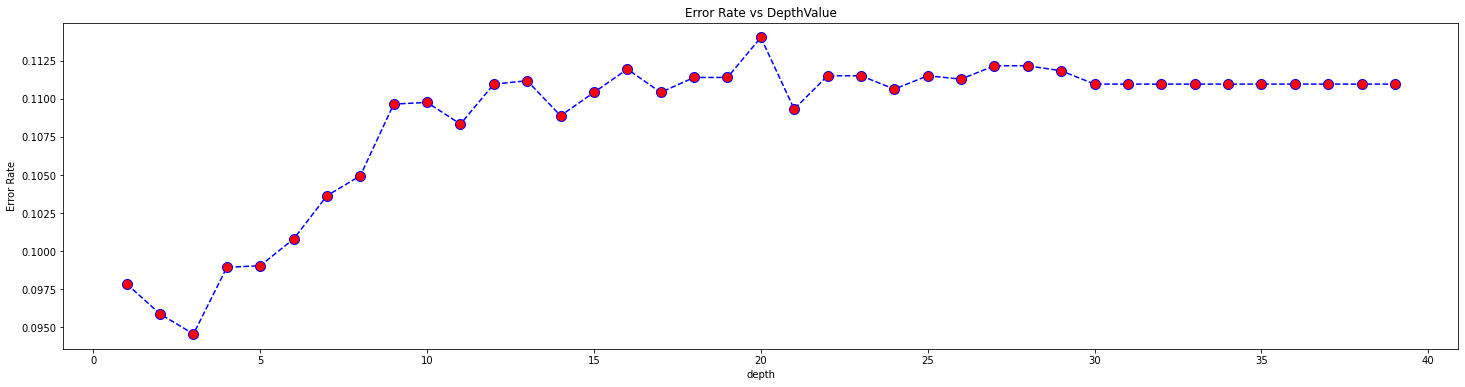

In [36]:
plt.figure(figsize=(25,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [43]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [2, 3,4, 5]
        }

# Create the model
xgboost_model = XGBClassifier(use_label_encoder=False)

# Best model
opt_model_xgb = GridSearchCV(xgboost_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_xgb.fit(train_m2, train_m2_target)

print (opt_model_xgb.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 1/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.2s
[CV 2/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 2/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.2s
[CV 3/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 3/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.2s
[CV 4/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 4/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.2s
[CV 5/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_

[CV 3/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.6s
[CV 4/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[CV 4/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 5/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[CV 5/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[CV 1/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 2/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[CV 2/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[

[CV 5/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 1/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 1/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 2/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 3/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 4/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 4/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=

[CV 3/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 4/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[CV 4/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[CV 5/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[CV 1/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[CV 2/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 3/5; 2

[CV 1/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 2/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 3/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 4/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 5/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 1/5; 3

[CV 4/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.1s
[CV 5/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[CV 5/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 1/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[CV 1/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 2/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[CV 2/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 3/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[CV 3/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=

[CV 1/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 2/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 3/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 3/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 4/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 4/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 5/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=

[CV 3/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 4/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 4/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 5/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 5/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 1/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[CV 1/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 2/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[CV 2/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=

[CV 5/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 1/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 2/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 2/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 3/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 3/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 4/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=

[CV 3/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[CV 4/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.1s
[CV 5/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[CV 5/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.1s
[CV 1/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[CV 1/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 2/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[CV 2/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.3s
[CV 3/5; 6

[CV 1/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 2/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 3/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 4/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.6s
[CV 5/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 5/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.6s
[CV 1/5; 7

[CV 4/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[CV 5/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[CV 1/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[CV 2/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[CV 3/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=

[CV 1/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 2/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 3/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 4/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 4/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 5/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=

#### Create and fit the model

In [52]:
# Create model with best parameters
xgboost_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5,
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Fit the best model
xgboost_model.fit(train_m2, train_m2_target)
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
predictions = xgboost_model.predict(test_m2)

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0    1   All
Actual                    
0          7671  323  7994
1           538  615  1153
All        8209  938  9147


In [54]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.905871


In [55]:
# Report
print(classification_report(test_m2_target,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7994
           1       0.66      0.53      0.59      1153

    accuracy                           0.91      9147
   macro avg       0.80      0.75      0.77      9147
weighted avg       0.90      0.91      0.90      9147



In [56]:
# Validate model using best model and cross validation
pecc_xgb = cross_val_score(xgboost_model, train_m2, train_m2_target, cv = 5).mean()
pecc_xgb

0.9040347655763759

### Model 3
#### Read CSV

In [57]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,1.468709,1.315671,0.575506,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.727884,...,-0.167650,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.113536,-0.696420,0
1,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.204000,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.905339,0.940431,0
2,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-1.335529,0.009410,...,-0.167650,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.905889,0.940431,0
3,2.595616,0.359589,-0.284073,-1.944969,-0.009193,-1.037765,-0.409284,-0.661530,-0.922053,1.446358,...,-0.167650,0.249588,-0.390321,0.162454,-1.705780,-1.326568,1.529138,-1.430308,-1.655691,1
4,0.430712,1.468709,-0.284073,1.079601,-0.009193,-1.037765,-0.409284,-0.661530,-1.335529,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.906989,0.940431,0


In [58]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.904239,0.940431,0
1,0.430712,-1.026811,-0.284073,-0.432684,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.009410,...,0.575650,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.849244,0.469678,0
2,0.430712,-1.026811,-0.284073,-1.440874,-0.009193,0.963609,2.443291,1.511648,0.731850,0.727884,...,-0.539300,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.847594,0.469678,0
3,0.430712,-1.026811,-0.284073,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.095102,-0.709064,...,-0.539300,0.249588,1.459600,-2.255863,-1.644939,-0.906305,-0.049740,-1.155332,-0.986993,0
4,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,0.731850,0.727884,...,0.947301,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.084388,-0.696420,0


In [59]:
#get target
train_m3_target = train_m3['y']
train_m3 = train_m3.drop(columns=['y'])

In [60]:
#get target
test_m3_target = test_m3['y']
test_m3 = test_m3.drop(columns=['y'])

### Check for lower errors

In [61]:
error_rate = []

for i in tqdm(range(1,40)):
    xgb = XGBClassifier(max_depth=i)
    xgb.fit(train_m3,train_m3_target)
    predictions = xgb.predict(test_m3)
    error_rate.append(np.mean(predictions != test_m3_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [02:00<00:00,  3.10s/it]


Text(0, 0.5, 'Error Rate')

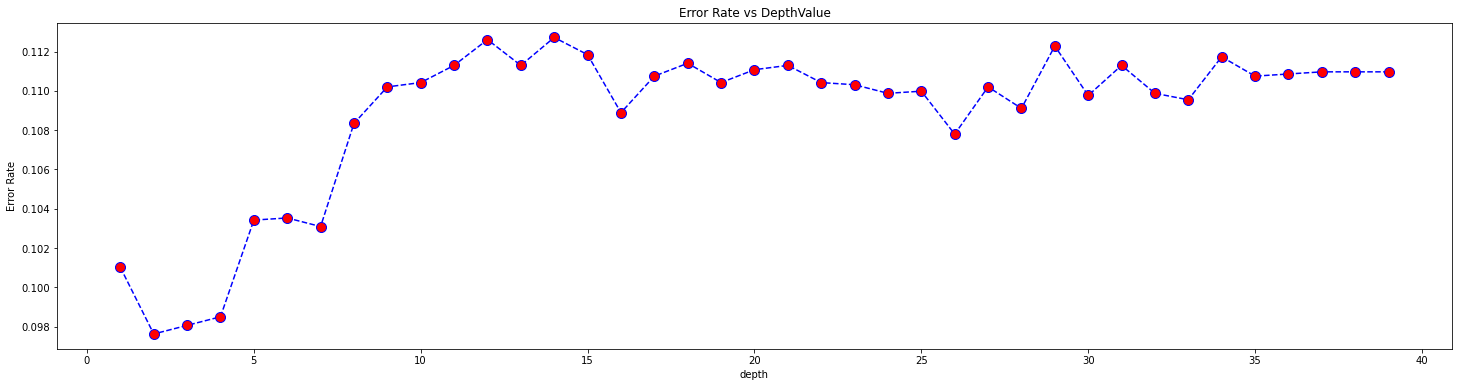

In [62]:
plt.figure(figsize=(25,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [63]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [2, 3,4]
        }

# Create the model
xgboost_model = XGBClassifier(use_label_encoder=False)

# Best model
opt_model_xgb = GridSearchCV(xgboost_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_xgb.fit(train_m3, train_m3_target)

print (opt_model_xgb.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


#### Create and fit the model

In [64]:
# Create model with best parameters
xgboost_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, 
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Fit the best model
xgboost_model.fit(train_m3, train_m3_target)
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [65]:
predictions = xgboost_model.predict(test_m3)

# Confusion matrix
confusion = pd.crosstab(test_m3_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0     1   All
Actual                     
0          7506   454  7960
1           428   759  1187
All        7934  1213  9147


In [66]:
# Accuracy
score = accuracy_score(test_m3_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.903575


In [67]:
# Report
print(classification_report(test_m3_target,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7960
           1       0.63      0.64      0.63      1187

    accuracy                           0.90      9147
   macro avg       0.79      0.79      0.79      9147
weighted avg       0.90      0.90      0.90      9147



In [68]:
# Validate model using best model and cross validation
pecc_xgb = cross_val_score(xgboost_model, train_m3, train_m3_target, cv = 5).mean()
pecc_xgb

0.8920115940259276

### Model 4
#### Read CSV

In [2]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.038917,1.363073,-0.351284,-0.512695,1.325358,0.350664,-0.204429,0.196894,-0.351367,0.195096,0.840943,1.537557,-0.279432,0.778118,0.846583,0
1,-0.761163,-0.286126,-0.820426,-0.512695,1.325358,1.966453,0.156584,0.196894,-0.351367,0.195096,0.840943,0.594054,-0.473904,0.774087,0.846583,1
2,-1.038917,-0.286126,1.056145,-0.512695,-0.754513,-0.457231,-0.565442,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.325914,-0.938246,0
3,-1.038917,1.363073,1.056145,-0.512695,1.325358,0.350664,-0.565442,0.196894,-0.351367,0.195096,-1.193288,-0.860010,-1.424658,-1.272939,-0.938246,0
4,-1.038917,-0.286126,1.056145,1.948838,1.325358,-1.265125,0.517596,0.196894,-0.351367,0.195096,0.840943,1.537557,-0.279432,0.771208,0.846583,0


In [3]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.349854,-0.286126,-0.351284,-0.512695,-0.754513,1.158558,-0.565442,0.196894,-0.351367,0.195096,-0.112602,-0.644401,-0.322648,0.265066,0.399684,1
1,0.905362,-0.286126,-0.351284,1.948838,-0.754513,-1.265125,-0.565442,0.196894,-0.351367,0.195096,-0.112602,-0.644401,-0.322648,0.233396,0.399684,0
2,-0.761163,-0.286126,-1.758712,1.948838,1.325358,-0.457231,-0.565442,0.196894,-0.351367,0.195096,0.650234,0.725144,0.887403,0.714778,0.333271,0
3,1.460871,1.363073,1.056145,-0.512695,-0.754513,1.966453,-0.565442,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.333976,-0.938246,1
4,-1.038917,-1.935325,-0.351284,-0.512695,1.325358,-1.265125,-0.204429,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.333976,-0.938246,0


In [4]:
#get target
train_m4_target = train_m4['y']
train_m4 = train_m4.drop(columns=['y'])

In [5]:
#get target
test_m4_target = test_m4['y']
test_m4 = test_m4.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,60)):
    xgb = XGBClassifier(max_depth=i)
    xgb.fit(train_m4,train_m4_target)
    predictions = xgb.predict(test_m4)
    error_rate.append(np.mean(predictions != test_m4_target))

  0%|                                                                                           | 0/59 [00:00<?, ?it/s]

[23:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  2%|█▍                                                                                 | 1/59 [00:00<00:17,  3.34it/s]

[23:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  3%|██▊                                                                                | 2/59 [00:00<00:16,  3.38it/s]

[23:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|████▏                                                                              | 3/59 [00:00<00:18,  3.07it/s]

[23:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  7%|█████▋                                                                             | 4/59 [00:01<00:20,  2.68it/s]

[23:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|███████                                                                            | 5/59 [00:02<00:24,  2.24it/s]

[23:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▍                                                                          | 6/59 [00:02<00:28,  1.84it/s]

[23:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|█████████▊                                                                         | 7/59 [00:03<00:33,  1.56it/s]

[23:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|███████████▎                                                                       | 8/59 [00:04<00:40,  1.26it/s]

[23:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|████████████▋                                                                      | 9/59 [00:06<00:50,  1.01s/it]

[23:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█████████████▉                                                                    | 10/59 [00:08<00:59,  1.22s/it]

[23:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 19%|███████████████▎                                                                  | 11/59 [00:09<01:03,  1.32s/it]

[23:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▋                                                                 | 12/59 [00:11<01:12,  1.54s/it]

[23:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|██████████████████                                                                | 13/59 [00:14<01:21,  1.77s/it]

[23:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|███████████████████▍                                                              | 14/59 [00:16<01:30,  2.00s/it]

[23:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 25%|████████████████████▊                                                             | 15/59 [00:18<01:31,  2.09s/it]

[23:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 27%|██████████████████████▏                                                           | 16/59 [00:21<01:33,  2.19s/it]

[23:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 29%|███████████████████████▋                                                          | 17/59 [00:23<01:34,  2.25s/it]

[23:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 31%|█████████████████████████                                                         | 18/59 [00:26<01:35,  2.34s/it]

[23:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 32%|██████████████████████████▍                                                       | 19/59 [00:28<01:37,  2.44s/it]

[23:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 34%|███████████████████████████▊                                                      | 20/59 [00:31<01:40,  2.58s/it]

[23:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|█████████████████████████████▏                                                    | 21/59 [00:34<01:42,  2.70s/it]

[23:44:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 37%|██████████████████████████████▌                                                   | 22/59 [00:38<01:48,  2.92s/it]

[23:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 39%|███████████████████████████████▉                                                  | 23/59 [00:41<01:49,  3.05s/it]

[23:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 41%|█████████████████████████████████▎                                                | 24/59 [00:44<01:48,  3.11s/it]

[23:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 42%|██████████████████████████████████▋                                               | 25/59 [00:48<01:49,  3.23s/it]

[23:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|████████████████████████████████████▏                                             | 26/59 [00:51<01:47,  3.27s/it]

[23:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|█████████████████████████████████████▌                                            | 27/59 [00:55<01:45,  3.29s/it]

[23:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 47%|██████████████████████████████████████▉                                           | 28/59 [00:58<01:46,  3.44s/it]

[23:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 49%|████████████████████████████████████████▎                                         | 29/59 [01:02<01:45,  3.52s/it]

[23:45:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 51%|█████████████████████████████████████████▋                                        | 30/59 [01:06<01:48,  3.74s/it]

[23:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 53%|███████████████████████████████████████████                                       | 31/59 [01:10<01:48,  3.87s/it]

[23:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 54%|████████████████████████████████████████████▍                                     | 32/59 [01:15<01:51,  4.11s/it]

[23:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|█████████████████████████████████████████████▊                                    | 33/59 [01:19<01:48,  4.19s/it]

[23:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 58%|███████████████████████████████████████████████▎                                  | 34/59 [01:24<01:47,  4.32s/it]

[23:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 59%|████████████████████████████████████████████████▋                                 | 35/59 [01:28<01:42,  4.27s/it]

[23:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 61%|██████████████████████████████████████████████████                                | 36/59 [01:32<01:37,  4.23s/it]

[23:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 63%|███████████████████████████████████████████████████▍                              | 37/59 [01:36<01:28,  4.02s/it]

[23:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|████████████████████████████████████████████████████▊                             | 38/59 [01:40<01:23,  3.99s/it]

[23:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 66%|██████████████████████████████████████████████████████▏                           | 39/59 [01:43<01:17,  3.88s/it]

[23:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 68%|███████████████████████████████████████████████████████▌                          | 40/59 [01:47<01:12,  3.79s/it]

[23:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 69%|████████████████████████████████████████████████████████▉                         | 41/59 [01:51<01:06,  3.70s/it]

[23:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 71%|██████████████████████████████████████████████████████████▎                       | 42/59 [01:54<01:03,  3.72s/it]

[23:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|███████████████████████████████████████████████████████████▊                      | 43/59 [01:58<01:00,  3.75s/it]

[23:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|█████████████████████████████████████████████████████████████▏                    | 44/59 [02:02<00:56,  3.79s/it]

[23:46:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|██████████████████████████████████████████████████████████████▌                   | 45/59 [02:06<00:52,  3.74s/it]

[23:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|███████████████████████████████████████████████████████████████▉                  | 46/59 [02:09<00:48,  3.70s/it]

[23:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|█████████████████████████████████████████████████████████████████▎                | 47/59 [02:13<00:43,  3.65s/it]

[23:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 81%|██████████████████████████████████████████████████████████████████▋               | 48/59 [02:16<00:40,  3.65s/it]

[23:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|████████████████████████████████████████████████████████████████████              | 49/59 [02:20<00:36,  3.61s/it]

[23:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|█████████████████████████████████████████████████████████████████████▍            | 50/59 [02:24<00:32,  3.62s/it]

[23:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|██████████████████████████████████████████████████████████████████████▉           | 51/59 [02:27<00:29,  3.64s/it]

[23:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|████████████████████████████████████████████████████████████████████████▎         | 52/59 [02:31<00:25,  3.63s/it]

[23:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████████████████████████████████████████████████████████████████████▋        | 53/59 [02:35<00:21,  3.65s/it]

[23:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|███████████████████████████████████████████████████████████████████████████       | 54/59 [02:38<00:18,  3.69s/it]

[23:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 93%|████████████████████████████████████████████████████████████████████████████▍     | 55/59 [02:42<00:14,  3.73s/it]

[23:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|█████████████████████████████████████████████████████████████████████████████▊    | 56/59 [02:46<00:11,  3.73s/it]

[23:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 57/59 [02:50<00:07,  3.71s/it]

[23:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|████████████████████████████████████████████████████████████████████████████████▌ | 58/59 [02:53<00:03,  3.71s/it]

[23:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [02:57<00:00,  3.01s/it]


Text(0, 0.5, 'Error Rate')

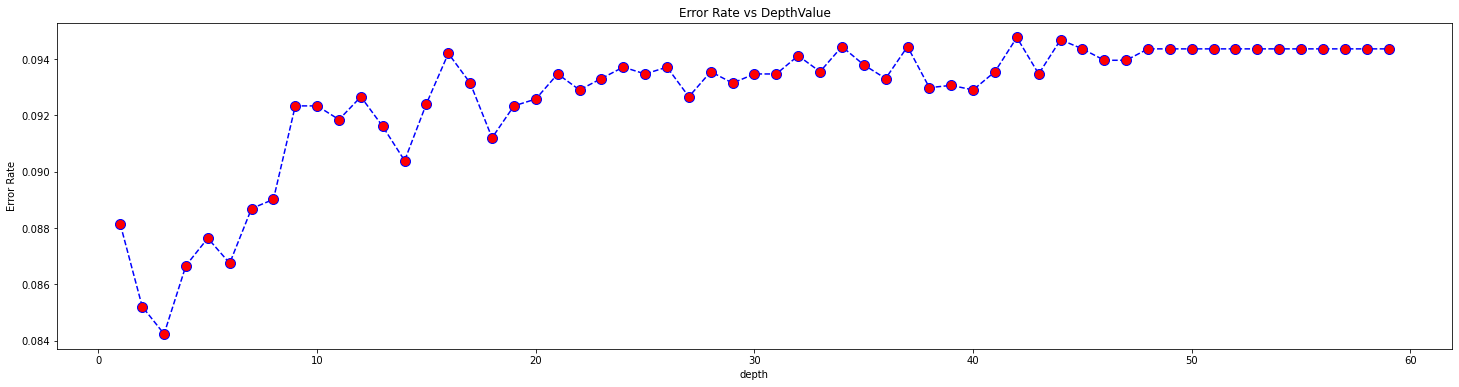

In [7]:
plt.figure(figsize=(25,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [8]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [2, 3,4, 5]
        }

# Create the model
xgboost_model = XGBClassifier(use_label_encoder=False)

# Best model
opt_model_xgb = GridSearchCV(xgboost_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_xgb.fit(train_m4, train_m4_target)

print (opt_model_xgb.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[23:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:0

[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:49:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Create and fit the model

In [9]:
# Create model with best parameters
xgboost_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Fit the best model
xgboost_model.fit(train_m4, train_m4_target)
xgboost_model

[23:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [10]:
predictions = xgboost_model.predict(test_m4)

# Confusion matrix
confusion = pd.crosstab(test_m4_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0     1    All
Actual                       
0          10586   381  10967
1            669   721   1390
All        11255  1102  12357


In [11]:
# Accuracy
score = accuracy_score(test_m4_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.915028


In [12]:
# Report
print(classification_report(test_m4_target,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10967
           1       0.65      0.52      0.58      1390

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [13]:
# Validate model using best model and cross validation
pecc_xgb = cross_val_score(xgboost_model, train_m4, train_m4_target, cv = 5).mean()
pecc_xgb

[23:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.9122126496149676

### Model 5
#### Read CSV

In [81]:
train_m5 = pd.read_csv('../../../../Data_AA2/train_m5.csv', sep = ',')
train_m5.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.542856,-1.154683,1.504582,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,1.194001,...,-0.204674,-5.083824,1.660200,2.938971,-1.947193,-0.804593,2.226079,-1.425183,-2.064840,1.0
1,-0.506227,-0.963193,-0.754426,1.376593,-1.766225,-0.010201,0.928497,-0.429774,-0.758480,-0.531893,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,-0.539387,0.760455,0.845530,0.0
2,-1.116306,1.334690,1.504582,-1.926794,1.180766,-0.010201,-1.077009,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
3,-1.179061,-0.197232,-1.036802,-0.275101,1.180766,-0.010201,0.928497,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
4,0.880355,-0.388722,-0.754426,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0


In [82]:
test_m5 = pd.read_csv('../../../../Data_AA2/test_m5.csv', sep = ',')
test_m5.head()

,level_0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,0.090003,0.939830,-0.275101,-0.292730,-0.010201,0.928497,-0.429774,1.318426,0.762528,...,0.507356,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
1,2,-0.580213,-1.036802,1.376593,-0.292730,-0.010201,-1.077009,-0.429774,-0.758480,0.762528,...,2.287429,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
2,3,0.760219,-0.754426,-0.275101,-1.275060,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
3,4,3.153847,0.375078,-1.926794,-1.766225,-0.010201,-1.077009,2.326804,-0.758480,-1.826313,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.390299,-1.425183,-0.942269,1.0
4,5,1.813416,0.375078,-0.275101,0.689601,-0.010201,-1.077009,-0.429774,-0.758480,-1.394840,...,-0.560688,0.196704,-0.351282,0.193233,0.763192,-0.804593,0.949710,0.760455,0.845530,0.0


In [83]:
#get target
train_m5 = train_m5.drop(columns=['index'])
train_m5_target = train_m5['y']
train_m5 = train_m5.drop(columns=['y'])

In [84]:
#get target
test_m5 = test_m5.drop(columns=['level_0'])
test_m5_target = test_m5['y']
test_m5 = test_m5.drop(columns=['y'])

### Check for lower errors

In [85]:
error_rate = []

for i in tqdm(range(1,40)):
    xgb = XGBClassifier(max_depth=i)
    xgb.fit(train_m5,train_m5_target)
    predictions = xgb.predict(test_m5)
    error_rate.append(np.mean(predictions != test_m5_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [02:13<00:00,  3.42s/it]


Text(0, 0.5, 'Error Rate')

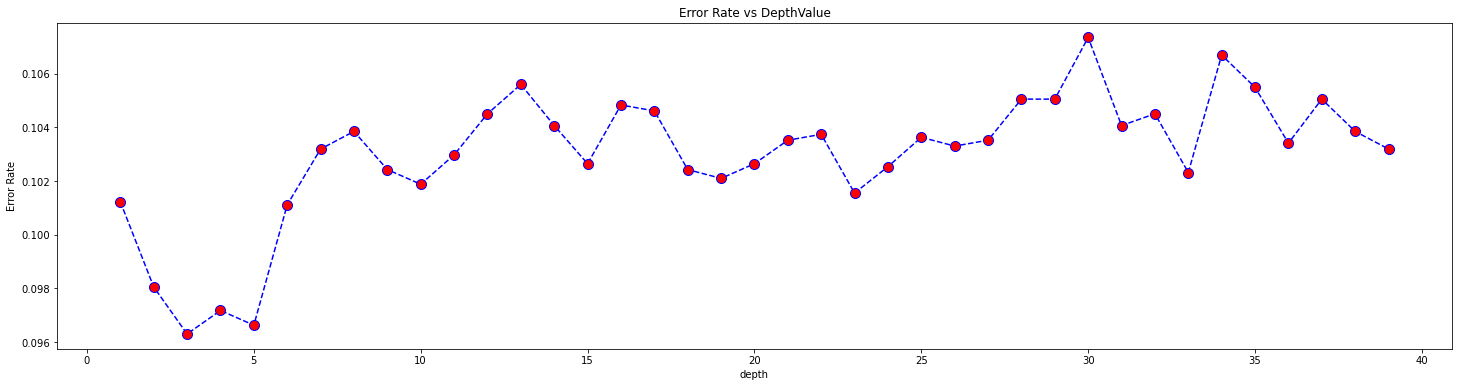

In [86]:
plt.figure(figsize=(25,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [87]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [2, 3,4, 5]
        }

# Create the model
xgboost_model = XGBClassifier(use_label_encoder=False)

# Best model
opt_model_xgb = GridSearchCV(xgboost_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_xgb.fit(train_m5, train_m5_target)

print (opt_model_xgb.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 1/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 2/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 2/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.5s
[CV 3/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 3/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[CV 4/5; 1/96] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 1/96] START colsample_bytree=0.6, gamma=0.5, max_

[CV 3/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 4/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[CV 4/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 5/5; 8/96] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[CV 5/5; 8/96] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.3s
[CV 1/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[CV 1/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 2/5; 9/96] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[CV 2/5; 9/96] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6; total time=   0.6s
[

[CV 5/5; 15/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.9s
[CV 1/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 1/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.7s
[CV 2/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 2/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.6s
[CV 3/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 3/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 4/5; 16/96] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[CV 4/5; 16/96] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0; total time=

[CV 3/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[CV 4/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.8s
[CV 5/5; 23/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[CV 5/5; 23/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 1/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[CV 1/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 2/5; 24/96] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[CV 2/5; 24/96] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 3/5; 2

[CV 1/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 2/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 2/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 3/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 3/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 4/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 4/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.6s
[CV 5/5; 31/96] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[CV 5/5; 31/96] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 1/5; 3

[CV 4/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 5/5; 38/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[CV 5/5; 38/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.2s
[CV 1/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[CV 1/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 2/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[CV 2/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=   0.4s
[CV 3/5; 39/96] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[CV 3/5; 39/96] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6; total time=

[CV 1/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.8s
[CV 2/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 2/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.9s
[CV 3/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 3/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.7s
[CV 4/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 4/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=   0.8s
[CV 5/5; 46/96] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[CV 5/5; 46/96] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0; total time=

[CV 3/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 4/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 4/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 5/5; 53/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 5/5; 53/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.4s
[CV 1/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[CV 1/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.3s
[CV 2/5; 54/96] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[CV 2/5; 54/96] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0; total time=

[CV 5/5; 60/96] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 1/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 2/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 2/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 3/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 3/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 4/5; 61/96] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[CV 4/5; 61/96] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=

[CV 3/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 4/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[CV 4/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 5/5; 68/96] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[CV 5/5; 68/96] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 1/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[CV 1/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.6s
[CV 2/5; 69/96] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[CV 2/5; 69/96] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.7s
[CV 3/5; 6

[CV 1/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 2/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 2/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 3/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 3/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.5s
[CV 4/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 4/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 5/5; 76/96] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[CV 5/5; 76/96] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0; total time=   0.4s
[CV 1/5; 7

[CV 4/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 5/5; 83/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[CV 5/5; 83/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6; total time=   0.3s
[CV 1/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[CV 1/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 2/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[CV 2/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=   0.2s
[CV 3/5; 84/96] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[CV 3/5; 84/96] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0; total time=

[CV 1/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.7s
[CV 2/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 2/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 3/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 3/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 4/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 4/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   0.5s
[CV 5/5; 91/96] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[CV 5/5; 91/96] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=

#### Create and fit the model

In [88]:
# Create model with best parameters
xgboost_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5,
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Fit the best model
xgboost_model.fit(train_m5, train_m5_target)
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [89]:
predictions = xgboost_model.predict(test_m5)

# Confusion matrix
confusion = pd.crosstab(test_m5_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0    1   All
Actual                    
0.0        7621  354  7975
1.0         538  635  1173
All        8159  989  9148


In [90]:
# Accuracy
score = accuracy_score(test_m5_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.902492


In [91]:
# Report
print(classification_report(test_m5_target,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      7975
         1.0       0.64      0.54      0.59      1173

    accuracy                           0.90      9148
   macro avg       0.79      0.75      0.77      9148
weighted avg       0.90      0.90      0.90      9148



In [92]:
# Validate model using best model and cross validation
pecc_xgb = cross_val_score(xgboost_model, train_m5, train_m5_target, cv = 5).mean()
pecc_xgb

0.9164439978417278